<a href="https://colab.research.google.com/github/yurigalindo/PyTorchSamples/blob/main/Colab%20Notebeooks/CLIP_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls

sample_data


In [ ]:
!unzip /content/gdrive/My\ Drive/imagenet100val.zip -d imagenet
!mkdir imagenet/train
!mkdir imagenet/train/n01440764/
!touch imagenet/train/n01440764/abc.jpg
#last lines are for fooling the train dataloader, since we wont use train images

In [ ]:
pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-3rvc8otn
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-3rvc8otn
     |████████████████████████████████| 53 kB 1.6 MB/s 
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369221 sha256=2841b78baeb514ecbb77995268f93741d8897cea12a308929879ea6051e8eac2
  Stored in directory: /tmp/pip-ephem-wheel-cache-mvkju9vx/wheels/fd/b9/c3/5b4470e35ed76e174bff77c92f91da82098d5e35fd5bc8cdac
Successfully built clip


In [ ]:
!pip install robustness

In [ ]:
dictionary = {
  "n01968897": "chambered nautilus, pearly nautilus, nautilus",
  "n01770081": "harvestman, daddy longlegs, Phalangium opilio",
  "n01818515": "macaw",
  "n02011460": "bittern",
  "n01496331": "electric ray, crampfish, numbfish, torpedo",
  "n01847000": "drake",
  "n01687978": "agama",
  "n01740131": "night snake, Hypsiglena torquata",
  "n01537544": "indigo bunting, indigo finch, indigo bird, Passerina cyanea",
  "n01491361": "tiger shark, Galeocerdo cuvieri",
  "n02007558": "flamingo",
  "n01735189": "garter snake, grass snake",
  "n01630670": "common newt, Triturus vulgaris",
  "n01440764": "tench, Tinca tinca",
  "n01819313": "sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita",
  "n02002556": "white stork, Ciconia ciconia",
  "n01667778": "terrapin",
  "n01755581": "diamondback, diamondback rattlesnake, Crotalus adamanteus",
  "n01924916": "flatworm, platyhelminth",
  "n01751748": "sea snake",
  "n01984695": "spiny lobster, langouste, rock lobster, crawfish, crayfish, sea crawfish",
  "n01729977": "green snake, grass snake",
  "n01614925": "bald eagle, American eagle, Haliaeetus leucocephalus",
  "n01608432": "kite",
  "n01443537": "goldfish, Carassius auratus",
  "n01770393": "scorpion",
  "n01855672": "goose",
  "n01560419": "bulbul",
  "n01592084": "chickadee",
  "n01914609": "sea anemone, anemone",
  "n01582220": "magpie",
  "n01667114": "mud turtle",
  "n01985128": "crayfish, crawfish, crawdad, crawdaddy",
  "n01820546": "lorikeet",
  "n01773797": "garden spider, Aranea diademata",
  "n02006656": "spoonbill",
  "n01986214": "hermit crab",
  "n01484850": "great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias",
  "n01749939": "green mamba",
  "n01828970": "bee eater",
  "n02018795": "bustard",
  "n01695060": "Komodo dragon, Komodo lizard, dragon lizard, giant lizard, Varanus komodoensis",
  "n01729322": "hognose snake, puff adder, sand viper",
  "n01677366": "common iguana, iguana, Iguana iguana",
  "n01734418": "king snake, kingsnake",
  "n01843383": "toucan",
  "n01806143": "peacock",
  "n01773549": "barn spider, Araneus cavaticus",
  "n01775062": "wolf spider, hunting spider",
  "n01728572": "thunder snake, worm snake, Carphophis amoenus",
  "n01601694": "water ouzel, dipper",
  "n01978287": "Dungeness crab, Cancer magister",
  "n01930112": "nematode, nematode worm, roundworm",
  "n01739381": "vine snake",
  "n01883070": "wombat",
  "n01774384": "black widow, Latrodectus mactans",
  "n02037110": "oystercatcher, oyster catcher",
  "n01795545": "black grouse",
  "n02027492": "red-backed sandpiper, dunlin, Erolia alpina",
  "n01531178": "goldfinch, Carduelis carduelis",
  "n01944390": "snail",
  "n01494475": "hammerhead, hammerhead shark",
  "n01632458": "spotted salamander, Ambystoma maculatum",
  "n01698640": "American alligator, Alligator mississipiensis",
  "n01675722": "banded gecko",
  "n01877812": "wallaby, brush kangaroo",
  "n01622779": "great grey owl, great gray owl, Strix nebulosa",
  "n01910747": "jellyfish",
  "n01860187": "black swan, Cygnus atratus",
  "n01796340": "ptarmigan",
  "n01833805": "hummingbird",
  "n01685808": "whiptail, whiptail lizard",
  "n01756291": "sidewinder, horned rattlesnake, Crotalus cerastes",
  "n01514859": "hen",
  "n01753488": "horned viper, cerastes, sand viper, horned asp, Cerastes cornutus",
  "n02058221": "albatross, mollymawk",
  "n01632777": "axolotl, mud puppy, Ambystoma mexicanum",
  "n01644900": "tailed frog, bell toad, ribbed toad, tailed toad, Ascaphus trui",
  "n02018207": "American coot, marsh hen, mud hen, water hen, Fulica americana",
  "n01664065": "loggerhead, loggerhead turtle, Caretta caretta",
  "n02028035": "redshank, Tringa totanus",
  "n02012849": "crane",
  "n01776313": "tick",
  "n02077923": "sea lion",
  "n01774750": "tarantula",
  "n01742172": "boa constrictor, Constrictor constrictor",
  "n01943899": "conch",
  "n01798484": "prairie chicken, prairie grouse, prairie fowl",
  "n02051845": "pelican",
  "n01824575": "coucal",
  "n02013706": "limpkin, Aramus pictus",
  "n01955084": "chiton, coat-of-mail shell, sea cradle, polyplacophore",
  "n01773157": "black and gold garden spider, Argiope aurantia",
  "n01665541": "leatherback turtle, leatherback, leathery turtle, Dermochelys coriacea",
  "n01498041": "stingray",
  "n01978455": "rock crab, Cancer irroratus",
  "n01693334": "green lizard, Lacerta viridis",
  "n01950731": "sea slug, nudibranch",
  "n01829413": "hornbill",
  "n01514668": "cock"
}
imagenet100_classes = [dictionary[key].split(",",1)[0] for key in sorted(dictionary.keys())]
del dictionary

In [ ]:
idx = [0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 11,
 14,
 16,
 18,
 19,
 20,
 21,
 22,
 24,
 26,
 28,
 29,
 32,
 33,
 34,
 35,
 36,
 38,
 39,
 41,
 42,
 46,
 48,
 50,
 52,
 54,
 55,
 56,
 57,
 59,
 60,
 61,
 64,
 65,
 66,
 67,
 68,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 80,
 81,
 83,
 84,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 96,
 97,
 99,
 100,
 104,
 106,
 107,
 108,
 110,
 111,
 112,
 113,
 115,
 116,
 117,
 118,
 119,
 123,
 124,
 125,
 127,
 129,
 130,
 133,
 134,
 135,
 137,
 138,
 140,
 141,
 143,
 144,
 146,
 150,
 517]

In [ ]:
from typing import Callable, List, Type

import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init
import clip
from torchvision.transforms import Compose, Resize, CenterCrop, ToTensor, Normalize, InterpolationMode
  
BICUBIC = InterpolationMode.BICUBIC
device = "cuda" if torch.cuda.is_available() else "cpu"

class CLIP(nn.Module):
    def __init__(self):
        super(CLIP, self).__init__()
        self.clip, self.preprocess = clip.load('ViT-B/32', device)
        self.text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in imagenet100_classes]).to(device)
        self.preprocess = Compose([
        Resize(224, interpolation=BICUBIC),
        CenterCrop(224),
        Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711)),
    ])
        print("Encoding texts")
        print(self.text_inputs)
    def forward(self, image: torch.Tensor) -> torch.Tensor:
        return self.clip(self.preprocess(image).to(device),self.text_inputs)[0]

In [ ]:
import os
os.environ['NOTEBOOK_MODE'] = '1'
import sys
import torch as ch
from torch.distributions.multivariate_normal import MultivariateNormal
import numpy as np
import seaborn as sns
from scipy import stats
from tqdm import tqdm, tqdm_notebook
import matplotlib.pyplot as plt
from robustness import model_utils, datasets
#from torch.utils.model_zoo import load_url as load_state_dict_from_url
from robustness.tools.vis_tools import show_image_row, show_image_column
from robustness.tools.label_maps import CLASS_DICT

DATA_PATH_DICT = {
    'CIFAR': '/tmp/',
    'RestrictedImageNet': 'imagenet',
    'ImageNet': 'imagenet',
    'H2Z': '/scratch/datasets/A2B/horse2zebra',
    'A2O': '/scratch/datasets/A2B/apple2orange',
    'S2W': '/scratch/datasets/A2B/summer2winter_yosemite'
}

%matplotlib inline

In [ ]:
# Constants
DATA = 'ImageNet' # Choices: ['CIFAR', 'ImageNet', 'RestrictedImageNet']
BATCH_SIZE = 5
NUM_WORKERS = 2
NUM_CLASSES_VIS = 5

DATA_SHAPE = 32 if DATA == 'CIFAR' else 224 # Image size (fixed for dataset)
DATA_SHAPE=224
REPRESENTATION_SIZE = 2048 # Size of representation vector (fixed for model)
CLASSES = CLASS_DICT[DATA] # Class names for dataset
NUM_CLASSES = len(CLASSES) - 1 
NUM_CLASSES_VIS = min(NUM_CLASSES_VIS, NUM_CLASSES)
GRAIN = 4 if DATA != 'CIFAR' else 1

In [ ]:
# Load dataset
dataset_function = getattr(datasets, DATA)
dataset = dataset_function(DATA_PATH_DICT[DATA])
_, test_loader = dataset.make_loaders(workers=NUM_WORKERS, 
                                      batch_size=BATCH_SIZE, 
                                      data_aug=False)
data_iterator = enumerate(test_loader)

==> Preparing dataset imagenet..


In [ ]:
def downsample(x, step=GRAIN):
    down = ch.zeros([len(x), 3, DATA_SHAPE//step, DATA_SHAPE//step])

    for i in range(0, DATA_SHAPE, step):
        for j in range(0, DATA_SHAPE, step):
            v = x[:, :, i:i+step, j:j+step].mean(dim=2, keepdim=True).mean(dim=3, keepdim=True)
            ii, jj = i // step, j // step
            down[:, :, ii:ii+1, jj:jj+1] = v
    return down

def upsample(x, step=GRAIN):
    up = ch.zeros([len(x), 3, DATA_SHAPE, DATA_SHAPE])

    for i in range(0, DATA_SHAPE, step):
        for j in range(0, DATA_SHAPE, step):
            ii, jj = i // step, j // step
            up[:, :, i:i+step, j:j+step] = x[:, :, ii:ii+1, jj:jj+1]
    return up

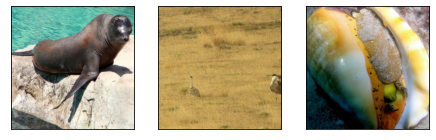

tensor([ True, False, False])


In [ ]:
L=99
for _, (im, targ) in enumerate(test_loader):
  if (ch.sum(targ==L)):
    show_image_row([im.cpu()])
    print(targ==L)
    break


In [ ]:
from random import sample
# Get seed distribution (can be memory intensive to do all ImageNet classes at once)

im_test, targ_test = [], []
classes_vis = sample(range(100),NUM_CLASSES_VIS)
#im_test must be from the same size of desired image generation
for _, (im, targ) in enumerate(test_loader):
  for i in classes_vis:
    im_test.append(im[targ ==i])
    targ_test.append(targ[targ==i])
im_test, targ_test = ch.cat(im_test), ch.cat(targ_test)

conditionals = []
for i in tqdm(classes_vis):
    imc = im_test[targ_test == i]
    if (len(imc)==0):
      print(f'error in {i}')
    down_flat = downsample(imc).view(len(imc), -1)
    mean = down_flat.mean(dim=0)
    down_flat = down_flat - mean.unsqueeze(dim=0)
    cov = down_flat.t() @ down_flat / len(imc)
    dist = MultivariateNormal(mean, covariance_matrix=cov+1e-4*ch.eye(3 * DATA_SHAPE//GRAIN * DATA_SHAPE//GRAIN))
    conditionals.append(dist)

100%|██████████| 5/5 [01:24<00:00, 16.96s/it]


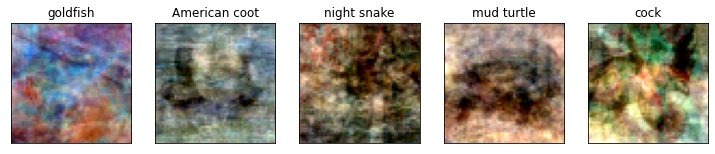

In [ ]:
# Visualize seeds
img_seed = ch.stack([conditionals[i].sample().view(3, DATA_SHAPE//GRAIN, DATA_SHAPE//GRAIN) 
                     for i in range(len(conditionals))])
img_seed = ch.clamp(img_seed, min=0, max=1)
show_image_row([img_seed.cpu()], tlist=[[f'{imagenet100_classes[x]}' for x in classes_vis ]])

In [ ]:
import torchvision
# Load model
clip_inst = CLIP()
# model_kwargs = {
#     'arch': 'resnet50',
#     'dataset': dataset,
# }

model_kwargs = {
    'arch': clip_inst,
    'dataset': dataset,
    'add_custom_forward': True
}
model, _ = model_utils.make_and_restore_model(**model_kwargs)
model.eval()

In [ ]:
def generation_loss(mod, inp, targ):
    op = mod(inp)
    loss = ch.nn.CrossEntropyLoss()(op, targ)
    return loss, None

kwargs = {
        #'custom_loss': generation_loss, maybe uncomment this
        'constraint':'2',
        'eps': 40,
        'step_size': 1,
        'iterations': 100,
        'targeted': True,
        'should_normalize': False,
}  
    
if DATA == 'CIFAR':
    kwargs['eps'] = 30
    kwargs['step_size'] = 0.5
    kwargs['iterations'] = 60
BATCH_SIZE=5

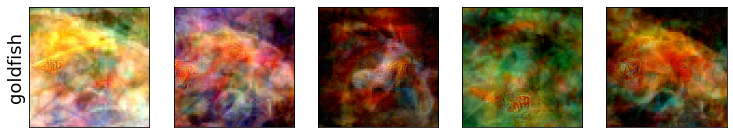

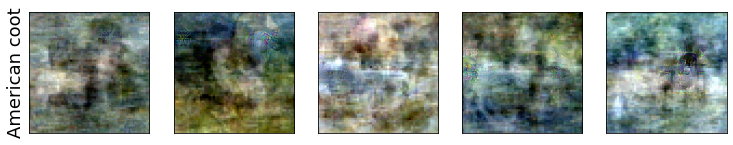

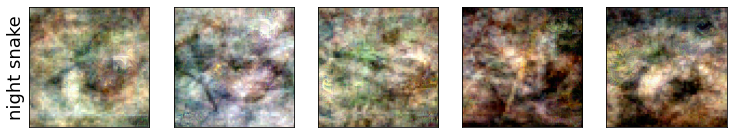

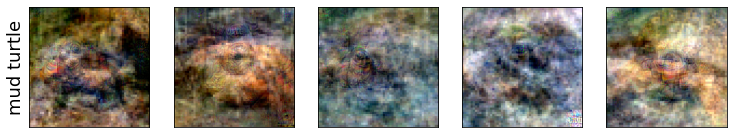

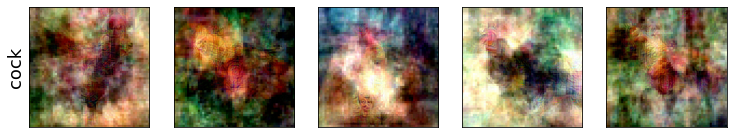

In [ ]:
show_seed = False
model = model.cuda()
origin_loss = []
generated_loss = []
for i in range(len(conditionals)):
    target_class = classes_vis[i] * ch.ones((BATCH_SIZE, ))
    #print(f'{i} - {cifar10.classes[i]}') 
    im_seed = ch.stack([conditionals[i].sample().view(3, DATA_SHAPE//GRAIN, DATA_SHAPE//GRAIN) 
                        for t in target_class])
    
    im_seed = upsample(ch.clamp(im_seed, min=0, max=1))
    _, im_gen = model(im_seed.cuda(), target_class.long().cuda(), make_adv=True, **kwargs)
    if show_seed:
        show_image_row([im_seed.cpu()], [f'Seed ($x_0$)'], fontsize=18)
    origin_loss.append(ch.mean(generation_loss(clip_inst.cuda(),im_seed.cuda(),target_class.cuda().to(torch.int64))[0]).detach())
    generated_loss.append(ch.mean(generation_loss(clip_inst.cuda(),im_gen.cuda(),target_class.cuda().to(torch.int64))[0]).detach())
    #print(ch.nn.functional.softmax(clip_inst(im_seed),dim=-1))
    #print(ch.nn.functional.softmax(clip_inst(im_gen),dim=-1))
    show_image_row([im_gen.detach().cpu()], 
                   [imagenet100_classes[classes_vis[i]] for t in target_class], 
                   fontsize=18)
    #print(torch.linalg.norm(im_seed.cuda() - im_gen.cuda()))

In [ ]:
print(origin_loss)

[tensor(1.8047, device='cuda:0', dtype=torch.float16), tensor(5.8945, device='cuda:0', dtype=torch.float16), tensor(2.4023, device='cuda:0', dtype=torch.float16), tensor(3.9473, device='cuda:0', dtype=torch.float16), tensor(3.4492, device='cuda:0', dtype=torch.float16)]


In [ ]:
print(ch.mean(ch.tensor(origin_loss)))

tensor(3.5000, dtype=torch.float16)


In [ ]:
print(ch.mean(ch.tensor(generated_loss)))

tensor(2.7537e-05, dtype=torch.float16)


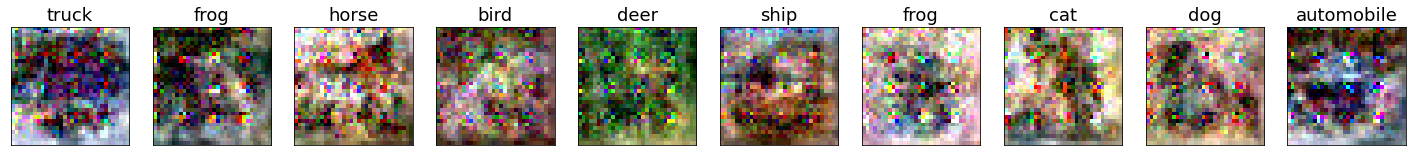

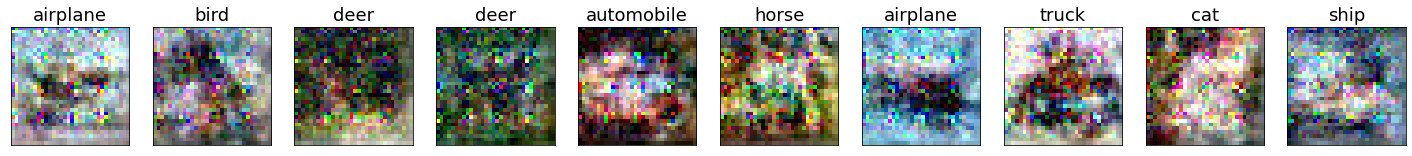

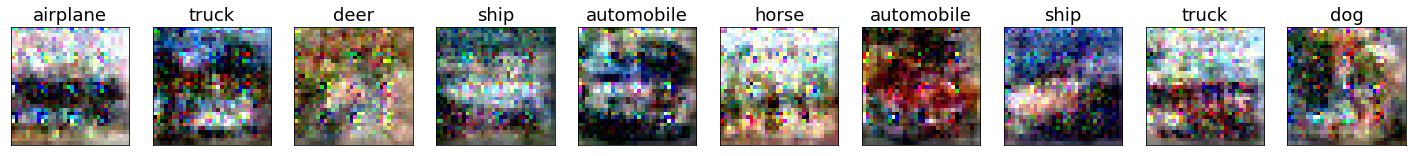

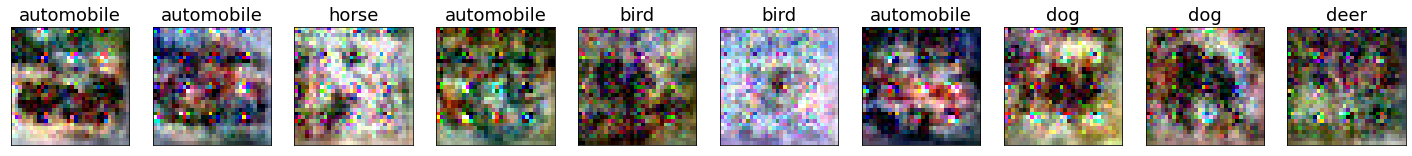

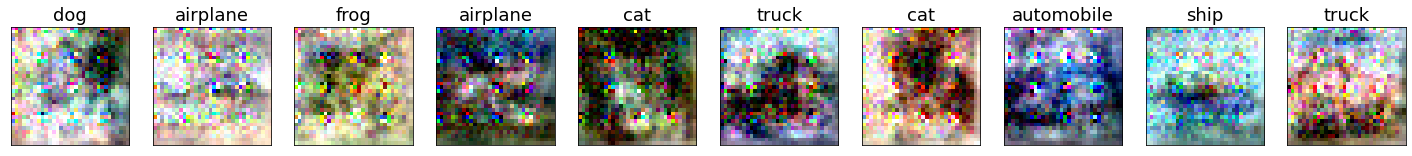

In [ ]:
show_seed = False
for i in range(5):
    target_class = ch.tensor(np.random.choice(range(NUM_CLASSES_VIS), (BATCH_SIZE,)))
    im_seed = ch.stack([conditionals[int(t)].sample().view(3, DATA_SHAPE//GRAIN, DATA_SHAPE//GRAIN) 
                        for t in target_class])
    
    im_seed = upsample(ch.clamp(im_seed, min=0, max=1))
    _, im_gen = model(im_seed.cuda(), target_class.long().cuda(), make_adv=True, **kwargs)
    if show_seed:
        show_image_row([im_seed.cpu()], [f'Seed ($x_0$)'], fontsize=18)
    show_image_row([im_gen.detach().cpu()], 
                   tlist=[[CLASSES[int(t)].split(',')[0] for t in target_class]], 
                   fontsize=18)

Bxc

In [ ]:
$ git clone git@github.com:sbarratt/inception-score-pytorch.git